# Read example thermometer data files from Jason Smith

Files are
```
./603_05May22.log
./604_05May22.log
./605_05May22.log
```

Parses data lines as regular expressions, and date stamps as DateTimes.

Jupyter IJulia notebook written in Julia; run in Julia 1.8.1.

In [1]:
using Dates

using PyPlot
ENV[ "MPLBACKEND" ] = "qt5agg"

#using MAT
#using NetCDF

"qt5agg"

In [2]:
"Read and parse lines from Jason Smith's 2022-05-05 data file with time stamps."
function get_data(
        filename, 
        nheaderlines=7, nfooterlines=11,
        data_ex = Regex( "^\\[([0-9]{2}:[0-9]{2}:[0-9.]{6})\\]"
                *" ([0-9]{1,}),"
                *" ([0-9.]{1,})\$"),
        df=DateFormat("HH:MM:SS.sss")
    )
    
    nlines = countlines( filename ) # count input lines in file
    ndata = nlines - nheaderlines - nfooterlines # ideal max data length
    
    # initialize arrays
    dtime = Array{DateTime, 1}( undef, ndata )
    msec = Array{Int64, 1}( undef, ndata )
    temp = Array{Float32, 1}( undef, ndata )
    
    i = 0 #number of lines skipped or read
    idata = 0 #number of data lines read
    
    open( filename, "r" ) do a
        while i < nheaderlines
            i += 1
            readline(a)
        end
        while idata < ndata
            i += 1
            l = readline(a)
            # parse 1 line
            m = match( data_ex, l )
            if !isnothing(m)
                idata += 1
                dtime[idata] = DateTime( m[:1], df )
                msec[idata] = parse( Int64, m[:2] )
                temp[idata] = parse( Float32, m[:3] )
            end
        end
    end
    
    return dtime, msec, temp
end

dt2min(dt) = (dt-dt[1])./Minute(1.) # convert time to number in minutes


get_data

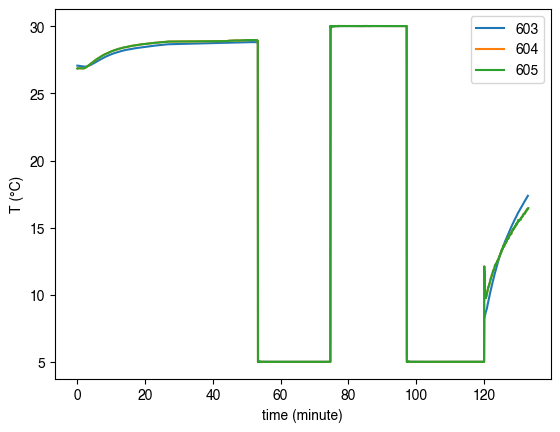

PyObject <matplotlib.legend.Legend object at 0x7fbdf7137fd0>

In [9]:
filenames = ["603_05May22.log", "605_05May22.log", "605_05May22.log"]

dtime, msec, temp = get_data( filenames[1] )
plot( dt2min(dtime), temp )

dtime, msec, temp = get_data( filenames[2] )
plot( dt2min(dtime), temp )

dtime, msec, temp = get_data( filenames[3] )
plot( dt2min(dtime), temp )

ylabel("T (°C)")
xlabel("time (minute)")
legend(["603", "604", "605"])

In [12]:
# line-by-line testing

filename="603_05May22.log"
nheaderlines=7
nfooterlines=11
data_ex = Regex( "^\\[([0-9]{2}:[0-9]{2}:[0-9.]{6})\\]"
                *" ([0-9]{1,}),"
                *" ([0-9.]{1,})\$")
df=DateFormat("HH:MM:SS.sss")

    
    nlines = countlines( filename ) # count input lines in file
    ndata = nlines - nheaderlines - nfooterlines # ideal max data length
    
    # initialize arrays
    dtime = Array{DateTime, 1}( undef, ndata )
    msec = Array{Int64, 1}( undef, ndata )
    temp = Array{Float32, 1}( undef, ndata )
    
#     i = 0 #number of lines skipped or read
#     idata = 0 #number of data lines read

    open( filename, "r" ) do a
        i = 0 #number of lines skipped or read
        idata = 0 #number of data lines read
        while i < nheaderlines
            i += 1
            readline(a)
        end
        
        while idata < ndata
            i += 1
            l = readline(a)
#             println(l)
            # parse 1 line
#             println(m)
            m = match( data_ex, l )
            if !isnothing(m)
                idata += 1
                dtime[idata] = DateTime( m[:1], df )
                msec[idata] = parse( Int64, m[:2] )
                temp[idata] = parse( Float32, m[:3] )
            end
        end
    end

# example data line
# [14:52:49.776] 500, 27.0644
# Regex matches 
# ^\[[0-9]{2}:[0-9]{2}:[0-9.]{6}\] [0-9]{3,}, [0-9.]{7,}$
# Regex divides into 5 numeric groups with ():
# ^\[([0-9]{2}):([0-9]{2}):([0-9.]{6})\] ([0-9]{3,}), ([0-9.]{7,})$
# Regex divides into datestring and 2 numeric groups:
# ^\[([0-9]{2}:[0-9]{2}:[0-9.]{6})\] ([0-9]{3,}), ([0-9.]{7,})$